In [3]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from corner import corner
from acor import acor

from utils.UL_uncert import UL_uncert

from matplotlib.colors import LogNorm

%matplotlib inline

In [1]:
rundir = '/home/pbaker/nanograv/bwm/tests/9yr_excise6_some/'
rundir = '/home/pbaker/nanograv/bwm/tests/9yr_excise6/'

with open(rundir + 'params.txt', 'r') as f:
    params = [line.rstrip('\n') for line in f]

# get just bwm params
par_bwm = params[-5:]
idx_A = par_bwm.index('log10_A_bwm')
idx_t0 = par_bwm.index('t0_bwm')

In [1]:
#rundir = '/home/pbaker/nanograv/bwm/tests/11yr_freespec/'
#rundir = '/home/pbaker/nanograv/bwm/tests/9yr_excise6_somemore/'
rundir = '/home/pbaker/nanograv/bwm/allsky/DE436_BE/detection/'

with open(rundir + 'params.txt', 'r') as f:
    params = [line.rstrip('\n') for line in f]
    
# get just bwm params
par_bwm = []
for par in params:
    if par.startswith('bwm_'):
        par_bwm.append(par)
idx_bwm = [params.index(p) for p in par_bwm]
idx_A = par_bwm.index('bwm_log10_A')
idx_t0 = par_bwm.index('bwm_t0')

In [5]:
last=336070

chain_raw = pd.read_csv(rundir + 'chain_1.txt',
                    sep='\t', dtype=float, header=None, nrows=last).values

In [12]:
burnfrac = 0.15
thin = 25

burn = int(0.15 * len(chain_raw))
chain = chain_raw[burn::thin]
chain_bwm = chain[:,idx_bwm]

corr = acor(chain_bwm[:,idx_A])[0]
N = len(chain_bwm)
print("N = {}, corr = {}, Neff = {}".format(N, corr, N/corr))

N = 11427, corr = 2.64607369453, Neff = 4318.47382921


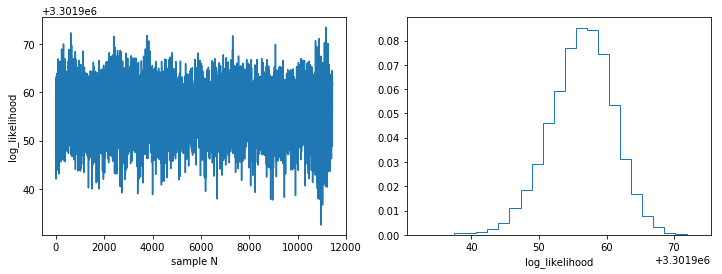

In [13]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
ax1.plot(chain[:,-4])
ax1.set_ylabel('log_likelihood')
ax1.set_xlabel('sample N')

ax2 = fig.add_subplot(122)
ax2.hist(chain[:,-4], bins=25, normed=True, histtype='step')
ax2.set_xlabel('log_likelihood')

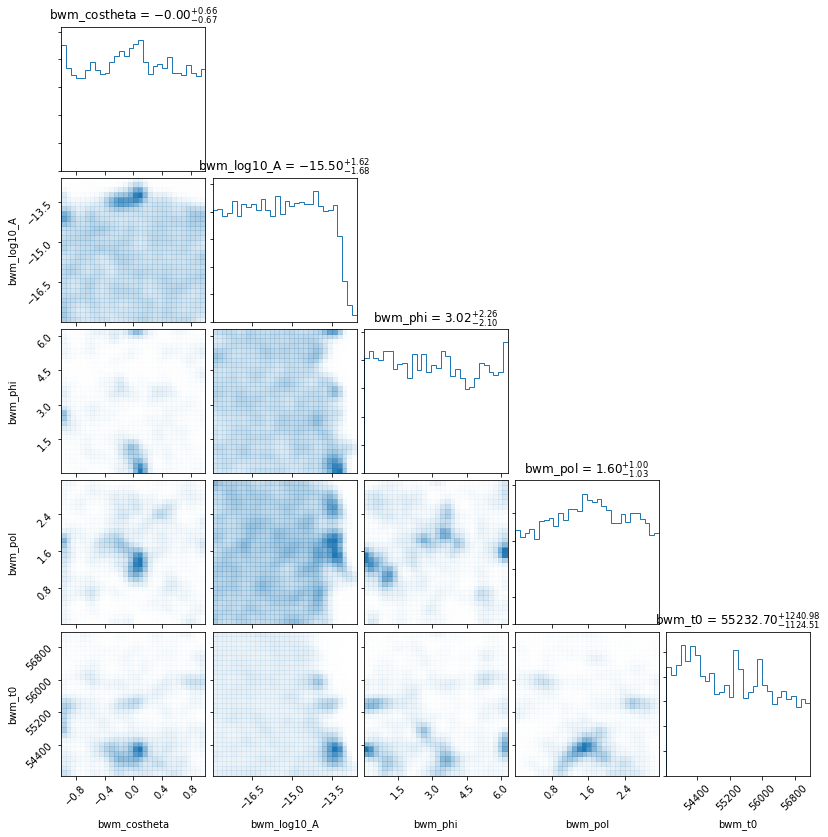

In [14]:
corner_kwargs = {'bins':30,
                 'show_titles':True,
                 'labels':par_bwm,
                 'smooth':1.0,
                 'plot_datapoints':False,
                 'plot_density':True,
                 'plot_contours':False,
                 'fill_contours':False,}

fig = corner(chain_bwm, color='C0', **corner_kwargs);
#fig.suptitle('11yr (free spectrum RN)');

In [23]:
Aprior = 1/(-11 - -18)

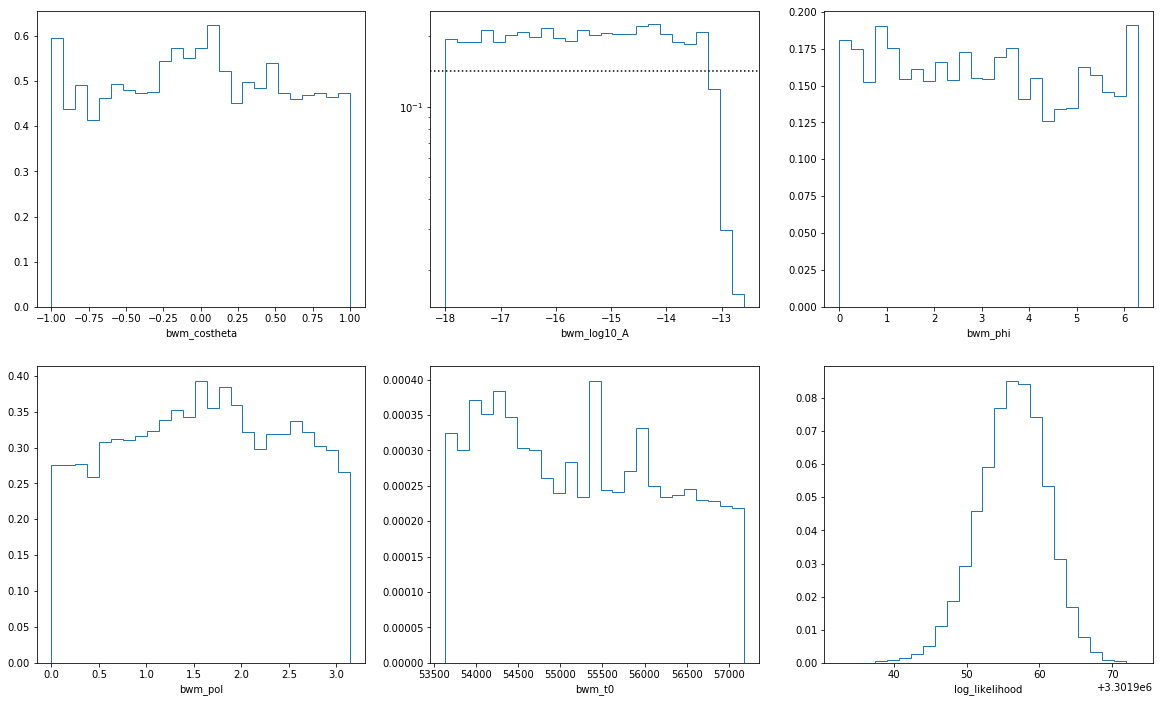

In [24]:
ax = []
fig = plt.figure(figsize=(20,12))

for pp, par in enumerate(par_bwm):
    ax.append(fig.add_subplot(2,3,pp+1))
    ax[pp].hist(chain_bwm[:,pp], bins=25, normed=True, histtype='step') #, label='')
    ax[pp].set_xlabel(par)

#ax[0].legend(loc='upper left')
ax[idx_A].set_yscale('log')
ax[idx_A].axhline(y=Aprior, ls=':', color='k')
#ax[idx_t0].set_yscale('log')

ax.append(fig.add_subplot(2,3,6))
ax[5].hist(chain[:,-4], bins=25, normed=True, histtype='step')
ax[5].set_xlabel('log_likelihood')

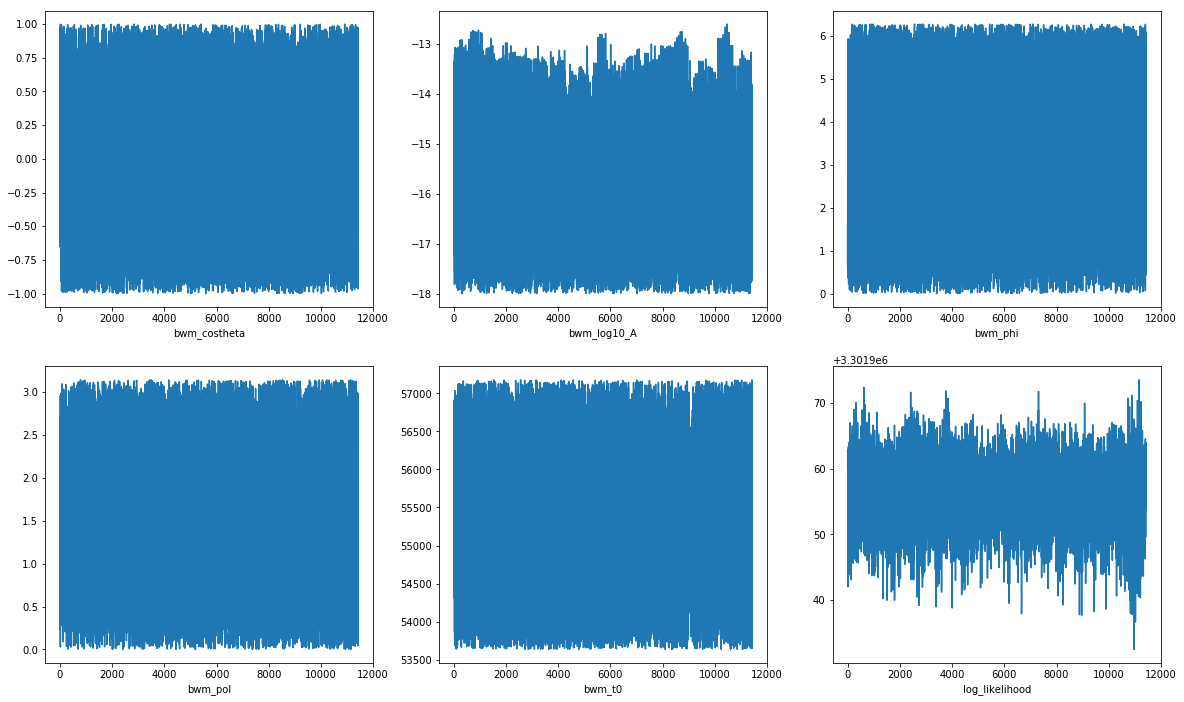

In [16]:
ax = []
fig = plt.figure(figsize=(20,12))

for pp, par in enumerate(par_bwm):
    ax.append(fig.add_subplot(2,3,pp+1))
    ax[pp].plot(chain_bwm[:,pp])
    ax[pp].set_xlabel(par)

ax.append(fig.add_subplot(2,3,6))
ax[5].plot(chain[:,-4])
ax[5].set_xlabel('log_likelihood')

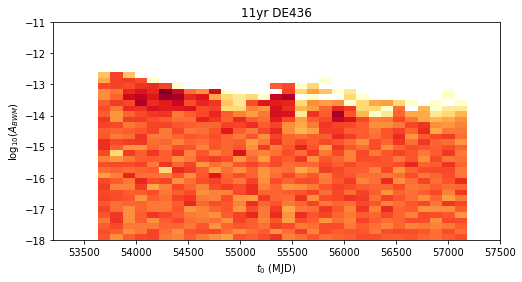

In [17]:
MJD = 55400
ex_start = MJD - 365/2
ex_end = MJD + 365/2

lognorm = LogNorm()

hist_kwargs = {'bins':30,
               'normed':True,
               'cmap':'YlOrRd',
               'norm':lognorm,
                }

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)

t0_ch = chain_bwm[:,idx_t0]
h_ch = chain_bwm[:,idx_A]
    
ax.hist2d(t0_ch, h_ch, **hist_kwargs)
ax.set_xlabel(r'$t_0$ (MJD)')
ax.set_ylabel(r'$\log_{10}(A_{BWM})$')
ax.set_ylim([-18,-11])
ax.set_xlim([53200, 57500])
ax.set_title('11yr DE436')

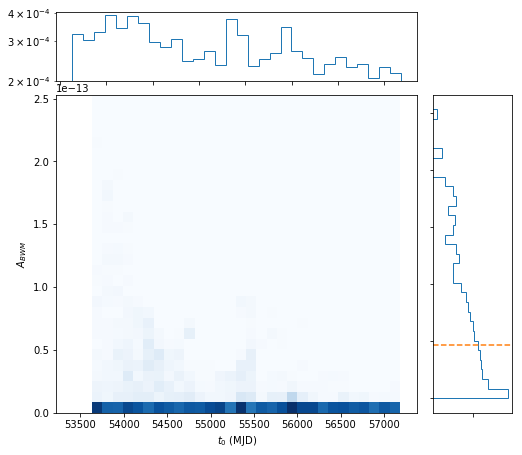

In [21]:
import matplotlib.gridspec as gridspec
from matplotlib.ticker import NullFormatter

TMIN = 53217.0
TMAX = 57387.0

A_ch = 10**h_ch

UL, dUL = UL_uncert(A_ch, p=0.95)

# Define size of figure
fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(10, 12)

# Define the positions of the subplots.
ax0 = plt.subplot(gs[6:10, 5:9])
axx = plt.subplot(gs[5:6, 5:9])
axy = plt.subplot(gs[6:10, 9:10])


hist_kwargs = {'bins':30,
               'normed':True,
               'cmap':'Blues',
              }
ax0.hist2d(t0_ch, A_ch, **hist_kwargs)
ax0.set_xlabel(r'$t_0$ (MJD)')
ax0.set_ylabel(r'$A_{BWM}$')
ax0.set_xlim([TMIN, TMAX])
#ax0.set_ylim([0, 1.0e-13])

axx.hist(t0_ch, 30, normed=True, histtype='step', color='C0')
axx.set_yscale('log')
axy.hist(A_ch, 30, normed=True, histtype='step', color='C0', orientation='horizontal')
axy.axhline(y=UL, color='C1', linestyle='--')
axy.set_xscale('log')
               
# Remove tick labels
nullfmt = NullFormatter()
axx.xaxis.set_major_formatter(nullfmt)
axx.yaxis.set_major_formatter(nullfmt)
axy.xaxis.set_major_formatter(nullfmt)
axy.yaxis.set_major_formatter(nullfmt)

## gwb + bwm

In [11]:
par_bwm

['bwm_costheta', 'bwm_log10_A', 'bwm_phi', 'bwm_pol', 'bwm_t0']

In [59]:
rundir = '/home/pbaker/nanograv/bwm/tests/7.5yr_gwb-bwm/'

with open(rundir + 'params.txt', 'r') as f:
    params = [line.rstrip('\n') for line in f]

# get just bwm params
par_bwm = params[-17:-12]
idx_A = par_bwm.index('bwm_log10_A')
idx_t0 = par_bwm.index('bwm_t0')

In [60]:
chain_raw = np.loadtxt(rundir + 'chain_1.txt')
burn = int(0.15 * len(chain_raw))
chain = chain_raw[burn:]
chain_bwm = chain[:,-21:-16]  # no ephem model

corr = acor(chain_bwm[:,idx_A])[0]
N = len(chain_bwm)
print("N = {}, corr = {}, Neff = {}".format(N, corr, N/corr))

N = 137870, corr = 1206.14947747, Neff = 114.305898709


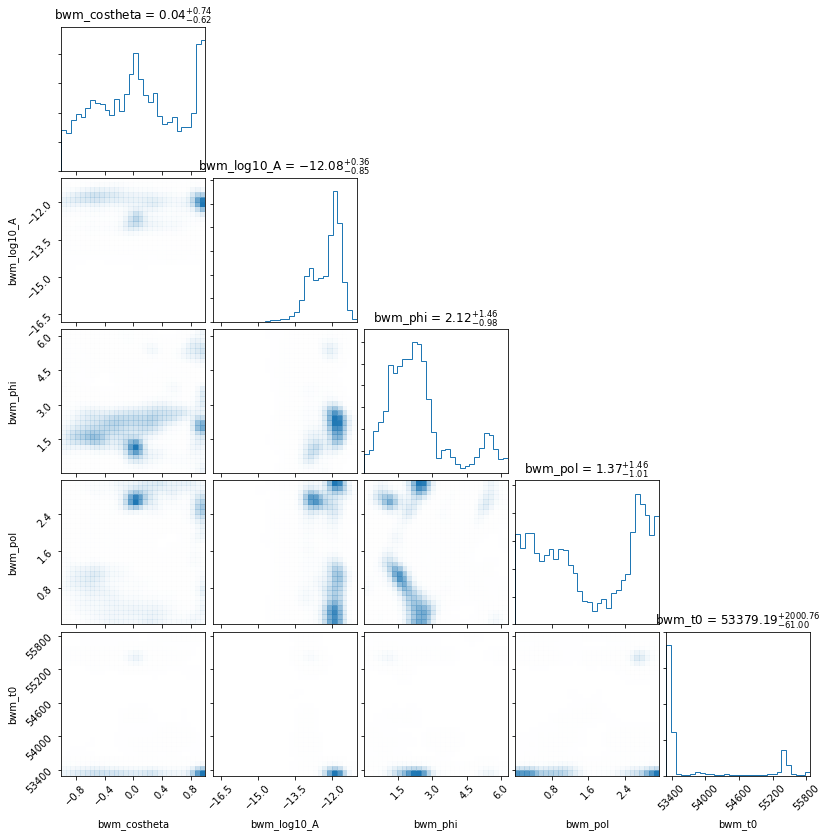

In [61]:
corner_kwargs = {'bins':30,
                 'show_titles':True,
                 'labels':par_bwm,
                 'smooth':1.0,
                 'plot_datapoints':False,
                 'plot_density':True,
                 'plot_contours':False,
                 'fill_contours':False,}

fig = corner(chain_bwm, color='C0', **corner_kwargs);
#fig.suptitle('11yr (free spectrum RN)');

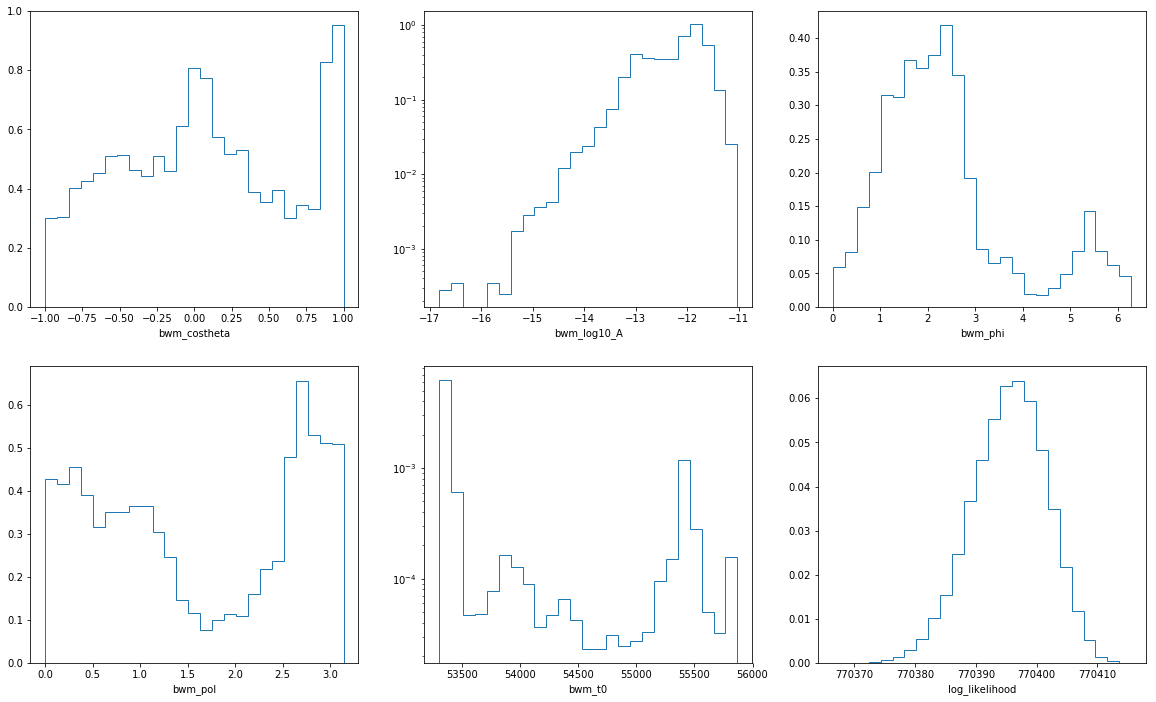

In [62]:
ax = []
fig = plt.figure(figsize=(20,12))

for pp, par in enumerate(par_bwm):
    ax.append(fig.add_subplot(2,3,pp+1))
    ax[pp].hist(chain_bwm[:,pp], bins=25, normed=True, histtype='step') #, label='')
    ax[pp].set_xlabel(par)

#ax[0].legend(loc='upper left')
ax[idx_A].set_yscale('log')
ax[idx_t0].set_yscale('log')

ax.append(fig.add_subplot(2,3,6))
ax[5].hist(chain[:,-4], bins=25, normed=True, histtype='step')
ax[5].set_xlabel('log_likelihood')

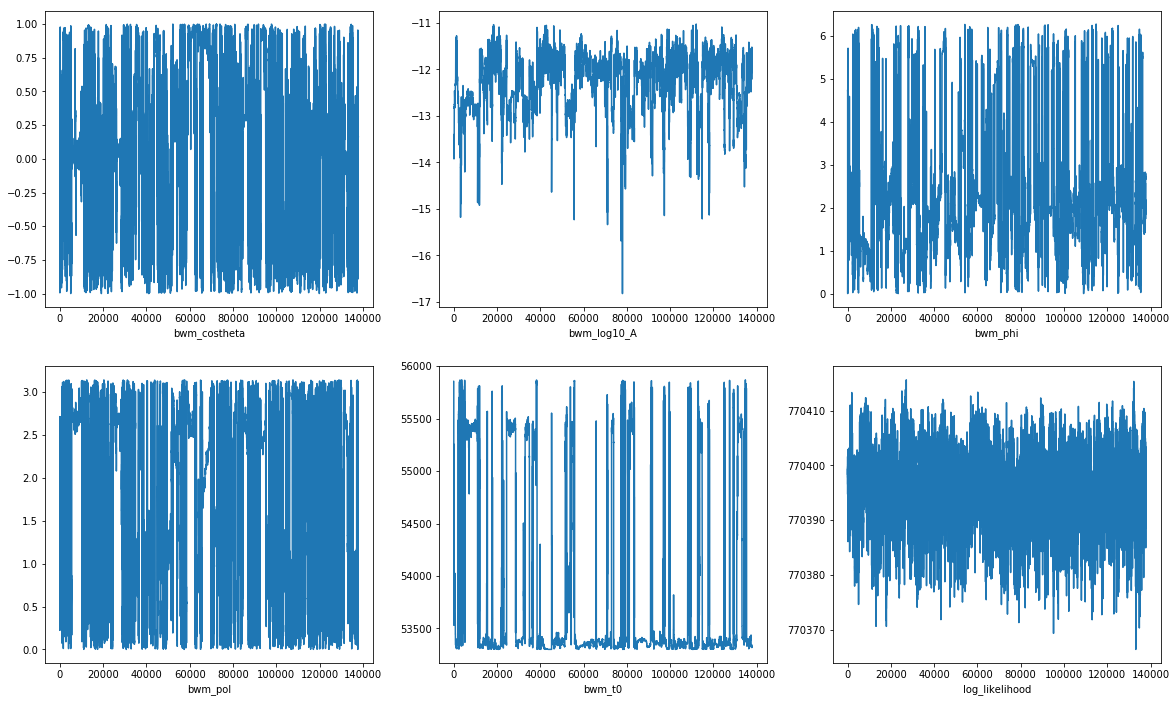

In [63]:
ax = []
fig = plt.figure(figsize=(20,12))

for pp, par in enumerate(par_bwm):
    ax.append(fig.add_subplot(2,3,pp+1))
    ax[pp].plot(chain_bwm[:,pp])
    ax[pp].set_xlabel(par)

ax.append(fig.add_subplot(2,3,6))
ax[5].plot(chain[:,-4])
ax[5].set_xlabel('log_likelihood')

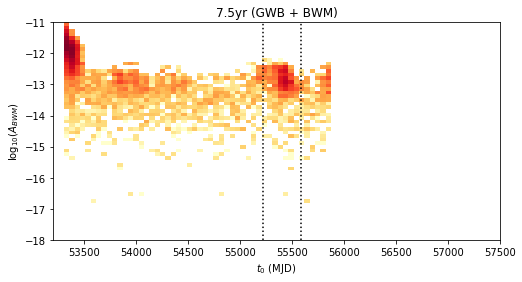

In [64]:
MJD = 55400
ex_start = MJD - 365/2
ex_end = MJD + 365/2

lognorm = LogNorm()

hist_kwargs = {'bins':50,
               'normed':True,
               'cmap':'YlOrRd',
               'norm':lognorm,
                }

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)

t0_ch = chain_bwm[:,idx_t0]
h_ch = chain_bwm[:,idx_A]
    
ax.hist2d(t0_ch, h_ch, **hist_kwargs)
ax.set_xlabel(r'$t_0$ (MJD)')
ax.set_ylabel(r'$\log_{10}(A_{BWM})$')
ax.set_ylim([-18,-11])
ax.set_xlim([53200, 57500])
ax.axvline(x=ex_start, color='k', linestyle=':')
ax.axvline(x=ex_end, color='k', linestyle=':')
ax.set_title('7.5yr (GWB + BWM)')

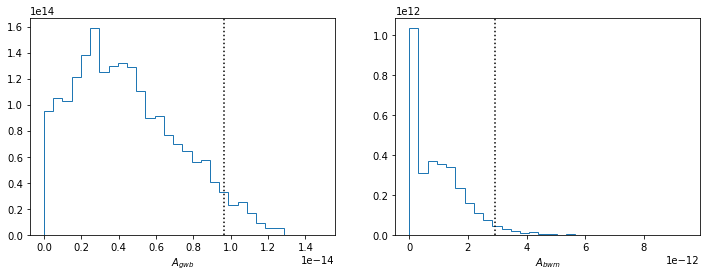

In [65]:
ind_Agwb = params.index('gwb_log10_A')
ch_gwb = chain[:, ind_Agwb]
ch_A = 10**ch_gwb
ch_B = 10**chain_bwm[:,idx_A]

ULgwb = np.percentile(ch_A, 95)
ULbwm = np.percentile(ch_B, 95)

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121)
ax.hist(ch_A, bins=30, normed=True, histtype='step')
ax.axvline(x=ULgwb, color='k', linestyle=':')
ax.set_xlabel(r'$A_{gwb}$')

axx = fig.add_subplot(122)
axx.hist(ch_B, bins=30, normed=True, histtype='step')
axx.axvline(x=ULbwm, color='k', linestyle=':')
axx.set_xlabel(r'$A_{bwm}$')

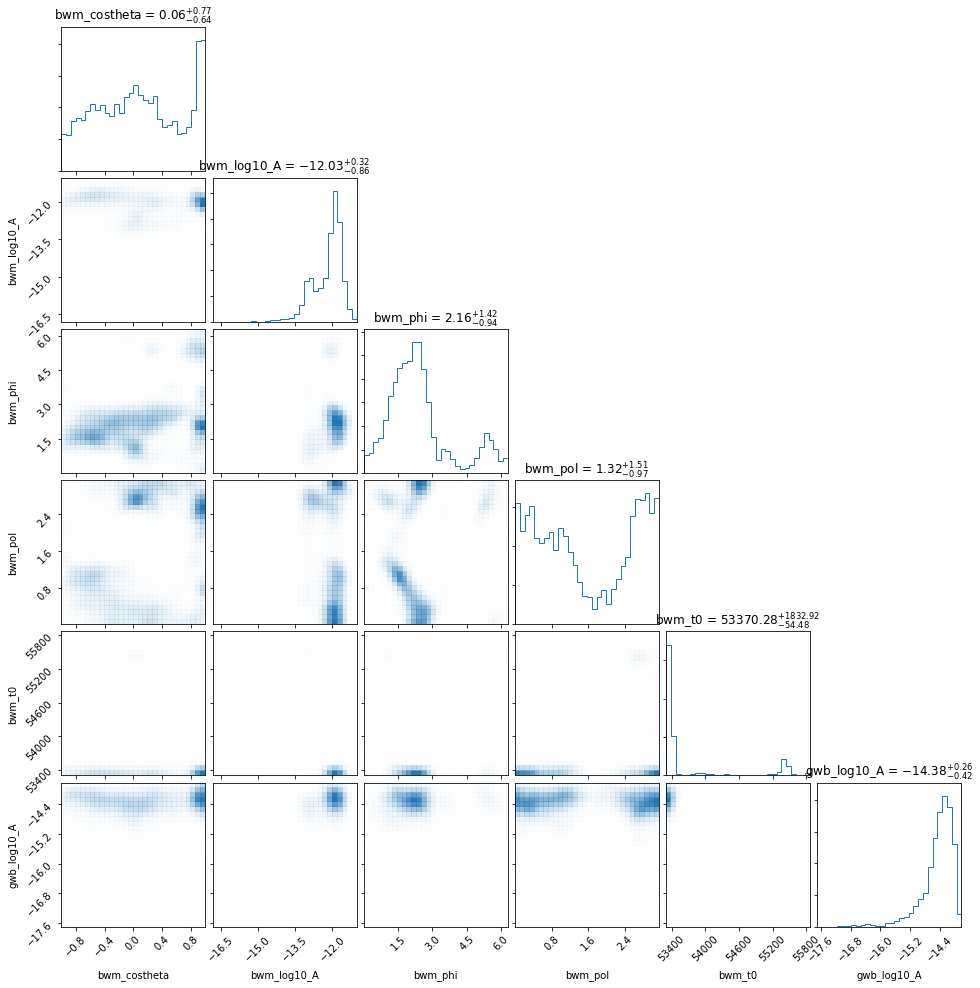

In [58]:
corner_kwargs = {'bins':30,
                 'show_titles':True,
                 'labels':par_bwm + ['gwb_log10_A'],
                 'smooth':1.0,
                 'plot_datapoints':False,
                 'plot_density':True,
                 'plot_contours':False,
                 'fill_contours':False,}

ch = np.hstack([chain_bwm, ch_gwb.reshape(len(ch_gwb),1)])

fig = corner(ch, color='C0', **corner_kwargs);
#fig.suptitle('11yr (free spectrum RN)');

## compare w/ 11yr

In [48]:
ephem = 'DE421'

slice_yr = 11.5

rundir = '/home/pbaker/nanograv/bwm/slices/{:.1f}/{}/'.format(slice_yr, ephem)

# this changes depending on which "names" are used in enterprise....

with open(rundir + 'params.txt', 'r') as f:
    params = [line.rstrip('\n') for line in f]

params = params[-5:]
idx_A = params.index('log10_A_bwm')
idx_t0 = params.index('t0_bwm')

chain_raw = np.loadtxt(rundir + 'chain_1.txt')
burn = int(0.25 * len(chain_raw))
chain = chain_raw[burn:]    
chain_full = chain[:,-9:-4]  # no ephem model

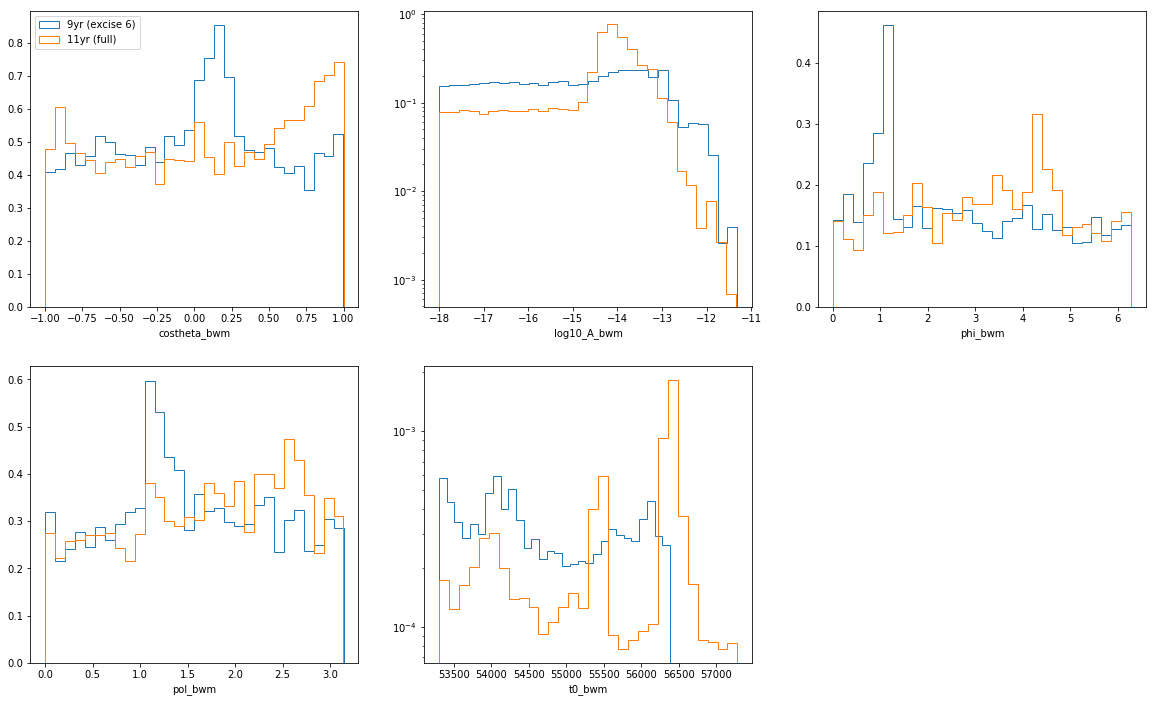

In [49]:
ax = []
fig = plt.figure(figsize=(20,12))

for pp, par in enumerate(params):
    ax.append(fig.add_subplot(2,3,pp+1))
    ax[pp].hist(chain_bwm[:,pp], bins=30, normed=True, histtype='step', label='9yr (excise 6)')
    ax[pp].hist(chain_full[:,pp], bins=30, normed=True, histtype='step', label='11yr (full)')
    ax[pp].set_xlabel(par)

ax[0].legend(loc='upper left')
ax[idx_A].set_yscale('log')
ax[idx_t0].set_yscale('log')

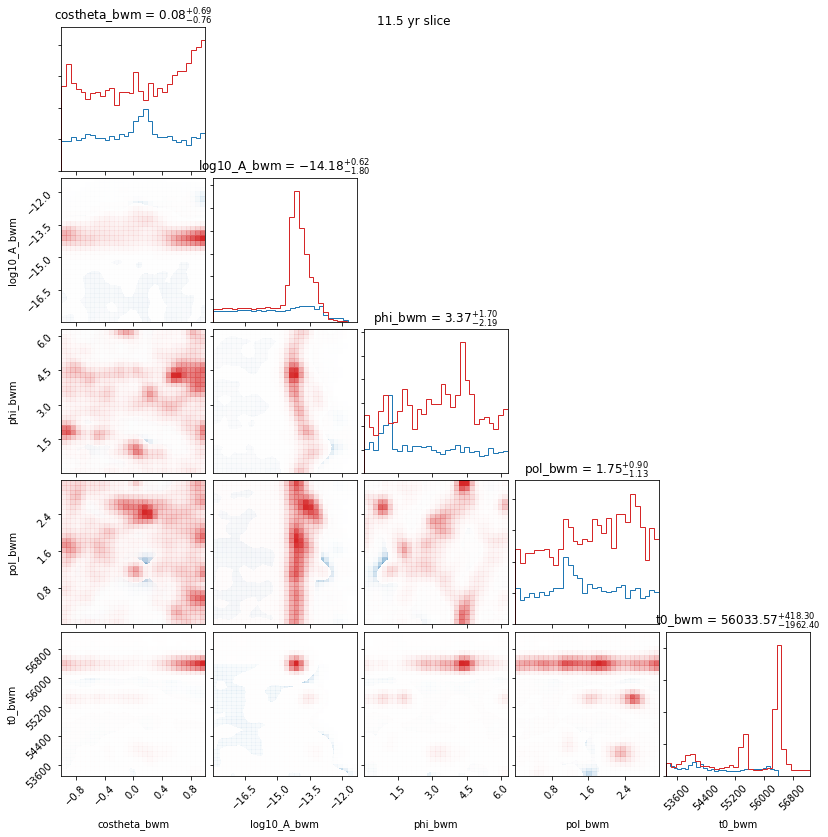

In [50]:
corner_kwargs = {'bins':30,
                 'show_titles':True,
                 'labels':params,
                 'smooth':1.0,
                 'plot_datapoints':False,
                 'plot_density':True,
                 'plot_contours':False,
                 'fill_contours':False,
                }

fig = corner(chain_bwm, color='C0', **corner_kwargs);
corner(chain_full, fig=fig, color='C3', **corner_kwargs);
fig.suptitle('{:.1f} yr slice'.format(slice_yr));

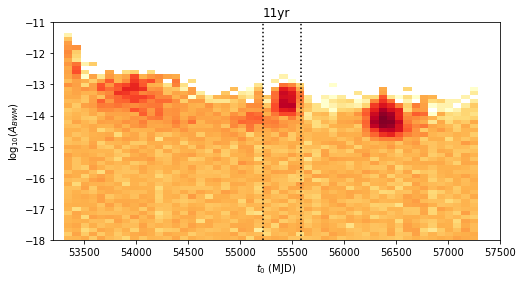

In [52]:
MJD = 55400
ex_start = MJD - 365/2
ex_end = MJD + 365/2

lognorm = LogNorm()

hist_kwargs = {'bins':50,
               'normed':True,
               'cmap':'YlOrRd',
               'norm':lognorm,
                }

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)

t0_ch = chain_full[:,idx_t0]
if max(chain_full[:,idx_A])>0:
    h_ch = np.log10(chain_bwm[:,idx_A])
else:
    h_ch = chain_full[:,idx_A]
    
ax.hist2d(t0_ch, h_ch, **hist_kwargs)
ax.set_xlabel(r'$t_0$ (MJD)')
ax.set_ylabel(r'$\log_{10}(A_{BWM})$')
ax.set_ylim([-18,-11])
ax.set_xlim([53200, 57500])
ax.set_title('11yr')
ax.axvline(x=ex_start, color='k', linestyle=':')
ax.axvline(x=ex_end, color='k', linestyle=':')

## compare w/ 9yr

In [53]:
ephem = 'DE421'

slice_yr = 9.0

rundir = '/home/pbaker/nanograv/bwm/slices/{:.1f}/{}/'.format(slice_yr, ephem)

# this changes depending on which "names" are used in enterprise....

with open(rundir + 'params.txt', 'r') as f:
    params = [line.rstrip('\n') for line in f]

params = params[-5:]
idx_A = params.index('log10_A_bwm')
idx_t0 = params.index('t0_bwm')

chain_raw = np.loadtxt(rundir + 'chain_1.txt')
burn = int(0.25 * len(chain_raw))
chain = chain_raw[burn:]    
chain_full = chain[:,-9:-4]  # no ephem model

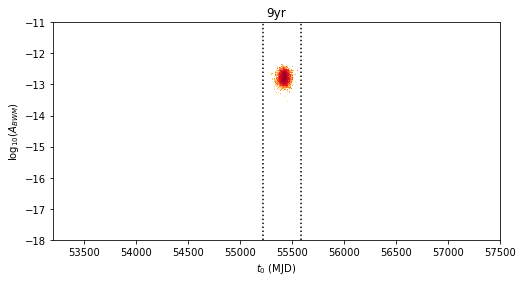

In [55]:
MJD = 55400
ex_start = MJD - 365/2
ex_end = MJD + 365/2

lognorm = LogNorm()

hist_kwargs = {'bins':50,
               'normed':True,
               'cmap':'YlOrRd',
               #'vmin':1.0e5,
               #'vmax':1.0e10,
               'norm':lognorm,
                }

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)

t0_ch = chain_full[:,idx_t0]
if max(chain_full[:,idx_A])>0:
    h_ch = np.log10(chain_bwm[:,idx_A])
else:
    h_ch = chain_full[:,idx_A]
    
ax.hist2d(t0_ch, h_ch, **hist_kwargs)
ax.set_xlabel(r'$t_0$ (MJD)')
ax.set_ylabel(r'$\log_{10}(A_{BWM})$')
ax.set_ylim([-18,-11])
ax.set_xlim([53200, 57500])
ax.set_title('9yr')
ax.axvline(x=ex_start, color='k', linestyle=':')
ax.axvline(x=ex_end, color='k', linestyle=':')